# Teoria del funcional de la densidad (DFT) - 1D

## A Toy model

**Aplicado para particulas libres, en un *potencial de pozo cuadrado y un potencial de oscilador armonico*, en una dimension, con repulsion electrostatica entre electrones, la aproximacion de densidad local (LDA - Local Density Approximation), con energia de intercambio sin correlacion.**

[enunciado original](http://dcwww.camd.dtu.dk/~askhl/files/python-dft-exercises.pdf)

### Resumen
Nuestro objetivo es escribir nuestro propio codigo de teoria funcional de densidad (DFT) de Kohn Sham (KS). Un codigo DFT con todas las funcioens es muy complejo, por lo que limitamos nuestras ambiciones al modelo mas simple posible que sigue siendo interesante: resolveremos iterativamente las ecuaciones de Kohn Sham para un oscilador armonico que incluye energia cinetica electronica, repulsion electrostatica entre los electrones y la aproximacion de densidad local para interacciones electronicas, ignorando la correlacion.

- Objetivo Principal: escribir nuestro propio codigo de DFT para las ecuaciones de Kohn Sham (KS)
    - Objetivo: un oscilador armonico que incluye energia cinetica, repulsion electroestatica entre los electrones y la aproximacion de densidad local para iteracciones electronicas, ignorando la correlacion.
    - Esto nos da el Hamiltoniano completo. incluido el potencial $v(x)$ que escribimos como:

$$ \hat{H} = -\frac{1}{2} \frac{d^{2}}{dx^{2}} + v(x) $$

$$ v(x) = v_{H_{a}}(x) + v_{LDA}(x) + x^{2} $$

$$ \hat{H} = -\frac{1}{2} \frac{d^{2}}{dx^{2}} + v_{H_{a}}(x) + v_{LDA}(x) + x^{2} $$

- Que tenemos que hacer?
    1. Representar al hamiltoniano
    2. Calcular las funciones de onda KS, y la densidad


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style("white")

## Operador diferencial

- Para representar el operador cinetico
- En esta seccion, nuestro objetivo es diferenciar unas curva sinusoidal, representada como una funcion de cuadricula de la siguiente manera:

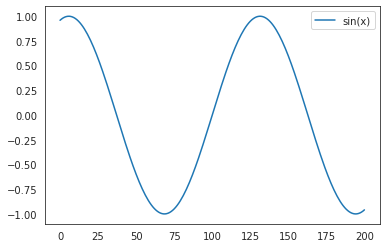

In [8]:
n_grid = 201 # Cantidad de divisiones que haremos
x_min = -5 # Rango de x, minimo
x_max = 5 # Rango de x, maximo
x = np.linspace(x_min, x_max, n_grid) # A las divisiones las haremos entre x_min y x_max
y = np.sin(x)
plt.plot(y, label='sin(x)')
plt.legend()
plt.show()

### Diferenciacion de primer orden
- Aproximado:
$$ \left( \frac{dy}{dx}\right)_{i} = \frac{y_{i+1} - y_{i}}{h} $$
donde asumimos que $\Lambda y = y_{i+1} - y_{i}\ \text{con}\ \Lambda y \rightarrow dy $


- Entonces:
$$ D_{ij} = \frac{\delta_{i+1,\ j} - \delta_{i,\ j}}{h} $$


- Podriamos escribir de la siguiente manera:

$$ \left( \frac{dy}{dx}\right)_{i} = D_{ij} y_{j}$$

- La derivada puede no estar bien definida al final de la cuadricula.
- $\delta_{ij}$ es la delta de Kronecker.
- La suma de Einstein se usa para la ultima ecuacion.

In [11]:
h = x[1]-x[0] # ESpaciado entre dos divisiones del grillado
D = -np.eye(n_grid) + np.diagflat(np.ones(n_grid-1), 1)
D = D / h
print(1/h)

20.00000000000007


```numpy.eye(N, M = Ninguno, k = 0, dtype = <clase 'float'>, orden = 'C')```  
Devuelve: ndarray de forma(N, M)  
Una matriz donde todos los elementos son iguales a cero, excepto la diagonal k, cuyos valores son iguales a uno.

In [12]:
n_dim = 4
print(np.eye(n_dim, k = 0))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [13]:
print(np.ones(n_dim))

[1. 1. 1. 1.]


La funcion ```diagflat()``` de la clase numpy de Python crea una matriz bidimensional con la entrada array_like como diagonal a la nueva matriz de salida.  

Sintaxis: ```numpy.diagflat (a, k = 0)```

Parametro:  
```a```: representa los datos de entrada tipo array_ con elementos diagonales.  
```k```: Representa el valor diagonal que requerimos. Es un parametro opcional y su valor predeterminado es 0. Si k > 0, la diagonal esta por encima de la diagonal principal o viceversa.

In [14]:
np.diagflat(np.ones(n_dim-1), 1)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

### Diferenciacion de segundo orden

- Del mismo modo que el primer pedido:

$$ D_{ij}^{2} = \frac{\delta_{i+1,\ j} - 2 \delta_{ij} + \delta_{i-1,\ j}}{h^{2}} $$

- Esto podria escribirse con el primer pedido $D_{ij}$, de la siguiente manera (tenga cuidado con la transposicion):

$$ D_{ij}^{2} = -D_{ik} D_{jk} $$

- La derivada puede no estar bien definida al final de la cuadricula.

In [15]:
D2 = D @ (-D.T)
D2[-1, -1] = D2[0, 0]

### Comprobacion

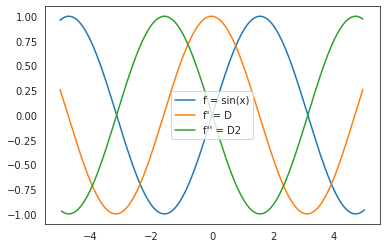

In [17]:
sns.set_style("white")
plt.plot(x, y, label="f = sin(x)")
plt.plot(x[:-1], D.dot(y)[:-1], label = "f' = D")
plt.plot(x[1:-1], D2.dot(y)[1:-1], label = "f'' = D2")
plt.legend()
plt.show()

## Electrones no interactuantes

- Este es el hamiltoniano de las particulas libres, que no interactuan, en una caja dada por el tamano de la cuadricula:

$$ \hat{H} = \hat{T} = - \frac{1}{2} \frac{d^{2}}{dx^{2}} $$

In [19]:
H = -1./2 * D2

- Podriamos resolver la ecuacion KS de la siguiente manera:

In [20]:
eig_non, psi_non = np.linalg.eigh(H) # non porque son no interactuantes las particulas 

```numpy.linalg.eigh(a, UPLO = 'L')``` Devuelve los valores propios y los vectores propios de una matriz hermitiana o simetrica (Hermitiano complejo (conjugado simetrico) o una matriz simetrica real).  

Devuelve dos objetos, una matriz 1-D que contiene los valores propios de a, y una matriz cuadrada 2-D (segun el tipo de entrada) de los vectores propios correspondientes (en columnas).

In [21]:
print(eig_non)

[4.83746959e-02 1.93487083e-01 4.35302063e-01 7.73761147e-01
 1.20878247e+00 1.74026081e+00 2.36806762e+00 3.09205105e+00
 3.91203599e+00 4.82782410e+00 5.83919388e+00 6.94590071e+00
 8.14767690e+00 9.44423177e+00 1.08352517e+01 1.23204003e+01
 1.38993183e+01 1.55716238e+01 1.73369124e+01 1.91947570e+01
 2.11447083e+01 2.31862946e+01 2.53190222e+01 2.75423752e+01
 2.98558158e+01 3.22587844e+01 3.47506999e+01 3.73309595e+01
 3.99989392e+01 4.27539935e+01 4.55954562e+01 4.85226400e+01
 5.15348368e+01 5.46313180e+01 5.78113348e+01 6.10741180e+01
 6.44188784e+01 6.78448069e+01 7.13510750e+01 7.49368345e+01
 7.86012181e+01 8.23433397e+01 8.61622939e+01 9.00571572e+01
 9.40269874e+01 9.80708243e+01 1.02187690e+02 1.06376588e+02
 1.10636507e+02 1.14966414e+02 1.19365264e+02 1.23831992e+02
 1.28365517e+02 1.32964744e+02 1.37628559e+02 1.42355835e+02
 1.47145429e+02 1.51996181e+02 1.56906919e+02 1.61876454e+02
 1.66903586e+02 1.71987097e+02 1.77125758e+02 1.82318327e+02
 1.87563547e+02 1.928601

In [22]:
print(psi_non)

[[ 0.00154746 -0.00309455 -0.00464089 ... -0.00464089  0.00309455
   0.00154746]
 [ 0.00309455 -0.00618611 -0.00927168 ...  0.00927168 -0.00618611
  -0.00309455]
 [ 0.00464089 -0.00927168 -0.0138823  ... -0.0138823   0.00927168
   0.00464089]
 ...
 [ 0.00464089  0.00927168 -0.0138823  ... -0.0138823  -0.00927168
   0.00464089]
 [ 0.00309455  0.00618611 -0.00927168 ...  0.00927168  0.00618611
  -0.00309455]
 [ 0.00154746  0.00309455 -0.00464089 ... -0.00464089 -0.00309455
   0.00154746]]


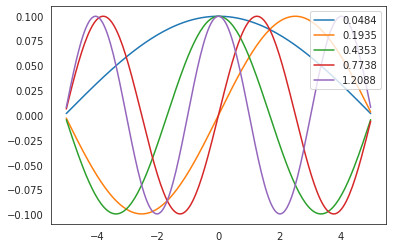

In [25]:
for i in range(5):
    plt.plot(x, psi_non[:, i], label=f"{eig_non[i]:.4f}")
    plt.legend(loc=1)

## Oscilador armonico

- Incluir el potencial externo $v_{ext} = x^{2}$:

$$ \hat{H} = \hat{T} + v_{ext} = - \frac{1}{2} \frac{d^{2}}{dx^{2}} + x^{2} $$

- Podemos escribir el potencial como una matriz $X$, de la siguiente manera:

In [26]:
X = np.diagflat(x*x)

- y resuelve las KS

In [27]:
eig_harm, psi_harm = np.linalg.eigh(-D2/2+X)

- plot

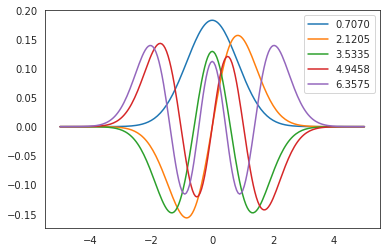

In [33]:
for i in range(5):
    plt.plot(x, psi_harm[:, i], label=f"{eig_harm[i]:.4f}")
    plt.legend(loc=1)
plt.show()

## Potencial pozo cuadrado

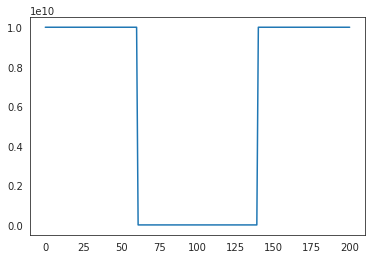

In [29]:
w = np.full_like(x, 1e10)
w[np.logical_and(x > -2, x < 2)] = 0.
plt.plot(w)

- Resuelve las KS

In [30]:
W = np.diagflat(w)
eig_well, psi_well = np.linalg.eigh(-D2/2+W)b
# La funcion diagflat() de la clase numpy de Python crea una matriz bidimensional
# con la entrada array_like como diagonal a la nueva matriz de salida.

- Plot

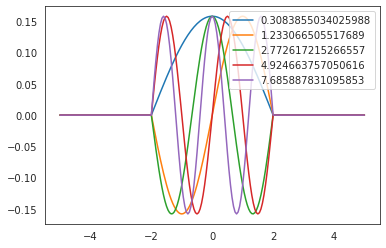

In [32]:
for i in range(5):
    plt.plot(x, psi_well[:, i], label=f"{eig_well[i]}")
    plt.legend(loc = 1)
plt.show()

## Densidad

- Queremos incluir la interaccion de Coulomb o Hatree, asi como el intercambio de LDA (Local Density Approcimation)
- Ambos son funcionales de densidad.
- Entonces necesitamos calcular la densidad electronica.
- Cada estado debe normalizarse:
$$ \int |\Psi|^{2} dx = 1 $$
- Sea $f_{n}$ numeros de ocupacion , la densidad $n(x)$ se puede escribir de la siguiente manera:
$$ n(x) = \sum_{n} f_{n}|\Psi (x)|^{2} $$
- Nota:
    - Cada estado se ajusta hasta dos electrones: uno con spin hacia arriba y otro con spin hacia abajo.
    - En DFT, calculamos el estado fundamental.

In [34]:
# Integral
def integral(x, y, axis=0):
    dx = x[1] - x[0]
    return np.sum(y*dx, axis = axis)

- Numero de electrones

In [35]:
num_electron = 17

- Densidad

In [36]:
def get_nx(num_electron, psi, x):
    # normalizacion
    I = integral(x, psi**2, axis = 0)
    normed_psi = psi/np.sqrt(I)[None, :]
    
    # Numero de ocupacion
    fn = [2 for _ in range(num_electron//2)]
    if num_electron % 2:
        fn.append(1)
        
    # Densidad
    res = np.zeros_like(normed_psi[:, 0])
    for ne, psi in zip(fn, normed_psi.T):
        res += ne * (psi**2)
    return res

- Plot

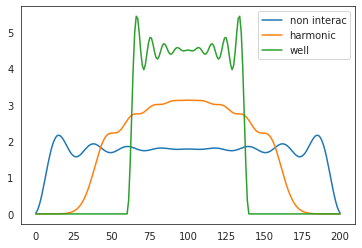

In [37]:
plt.plot(get_nx(num_electron, psi_non, x), label="non interac")
plt.plot(get_nx(num_electron, psi_harm, x), label="harmonic")
plt.plot(get_nx(num_electron, psi_well, x), label="well")
plt.legend(loc=1)
plt.show()

## Energia de cambio

- Considere el funcional de intercambio en la LDA:
    - ignoramos la correlacion por simplicidad.
    $$ E_{X}^{LDA}[n] = - \frac{3}{4} \left( \frac{3}{\pi} \right)^{\frac{1}{3}} \int n^{\frac{4}{3}} dx $$
- El potencial viene dado por la derivada de la energia de intercambio con respecto a la densidad:
    $$ v_{X}^{LDA}[n] = \frac {\partial E_{X}^{LDA}}{\partial n} = - \left( \frac{3}{\pi} \right)^{\frac{1}{3}} n^{\frac{1}{3}} $$
- Codigo

In [39]:
def get_exchange(nx, x):
    energy = -3./4. * (3. / np.pi)**(1./3) * integral(x, nx**(4./3))
    potential = -(3./np.pi)**(1./3) * nx**(1./3)
    return energy, potential

## Potencial de Coulomb

- Energia electrostatica o energia de Hartree.
- La expresion de la energia 3D-Hartree no converge en 1D.
- Por lo tanto, hacemos trampa y utilizamos una modificacion de la siguiente manera:
$$ E_{H_{a}} = \frac {1}{2} \int \int \frac{n(x) n(x')}{\sqrt{(x-x')^{2} + \epsilon}} dx dx' $$
    - donde $\epsilon$ es una pequena constante positiva
- El potencial viene dado por:
$$ v_{H_{a}} = \int \frac{n(x')}{\sqrt{(x-x')^{2} + \epsilon}} dx' $$
- Es una expresion matricial
\begin{align*}
    E_{H_{a}} &= \frac{1}{2} \frac {n_{i} n_{j} h^{2}}{\sqrt{(x_{i}-x_{j})^{2} + \epsilon}} \\
    v_{H_{a,\ i}} &= \frac {n_{j} h}{\sqrt{(x_{i}-x_{j})^{2} + \epsilon}}
\end{align*}

In [40]:
def get_hatree(nx, x, eps=1e-1):
    h = x[1] - x[0]
    energy = np.sum(nx[None,:]*nx[:,None]*h**2/np.sqrt((x[None,:]-x[:,None])**2+eps)/2)
    potential = np.sum(nx[None,:]*h/np.sqrt((x[None,:]-x[:,None])**2+eps), axis = -1)
    return energy, potential

## Resolver la ecuacion de KS: ciclo de autoconsistencia

0. Inicializar la densidad (puede tomar una constante arbitraria).
1. Calcular los potenciales de intercambio y Hatree.
2. Calcular el hamiltoniano.
3. Calcular las funciones de onda y los valores propios.
4. Si no converge, calcule la densidad y vuelva a 1.

In [41]:
def print_log(i, log):
    print(f"paso: {i:<5} energia: {log['energy'][-1]:<10.4f} dif_energia: {log['energy_diff'][-1]:.10f}")

In [42]:
max_iter = 1000
energy_tolerance = 1e-5
log = {"energy":[float("inf")], "energy_diff":[float("inf")]}

In [43]:
nx = np.zeros(n_grid)
for i in range(max_iter):
    ex_energy, ex_potential = get_exchange(nx, x)
    ha_energy, ha_potential = get_hatree(nx, x)
    
    # Hamiltoniano
    H = -D2/2+np.diagflat(ex_potential+ha_potential+x*x)
    
    energy, psi = np.linalg.eigh(H)
    
    # Logaritmo
    log["energy"].append(energy[0])
    energy_diff = energy[0] - log["energy"][-2]
    log["energy_diff"].append(energy_diff)
    print_log(i, log)
    
    # Convergencia
    if abs(energy_diff) < energy_tolerance:
        print("convergida!")
        break
        
    # actualiza la densidad
    nx = get_nx(num_electron, psi, x)
else:
    print("no convergida")

paso: 0     energia: 0.7070     dif_energia: -inf
paso: 1     energia: 16.3623    dif_energia: 15.6553962737
paso: 2     energia: 13.8022    dif_energia: -2.5601876034
paso: 3     energia: 15.3000    dif_energia: 1.4978885215
paso: 4     energia: 14.4120    dif_energia: -0.8880947510
paso: 5     energia: 14.9469    dif_energia: 0.5349405204
paso: 6     energia: 14.6241    dif_energia: -0.3227513309
paso: 7     energia: 14.8200    dif_energia: 0.1958784779
paso: 8     energia: 14.7010    dif_energia: -0.1189974413
paso: 9     energia: 14.7735    dif_energia: 0.0724388038
paso: 10    energia: 14.7293    dif_energia: -0.0441133665
paso: 11    energia: 14.7562    dif_energia: 0.0268826032
paso: 12    energia: 14.7398    dif_energia: -0.0163841815
paso: 13    energia: 14.7498    dif_energia: 0.0099880557
paso: 14    energia: 14.7437    dif_energia: -0.0060890811
paso: 15    energia: 14.7475    dif_energia: 0.0037124227
paso: 16    energia: 14.7452    dif_energia: -0.0022634278
paso: 17    e

- Plot

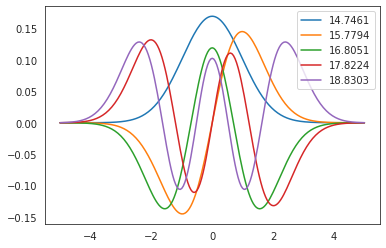

In [44]:
for i in range(5):
    plt.plot(x, psi[:,i], label=f"{energy[i]:.4f}")
    plt.legend(loc=1)
plt.show()

- Compara la densidad con las particulas libres

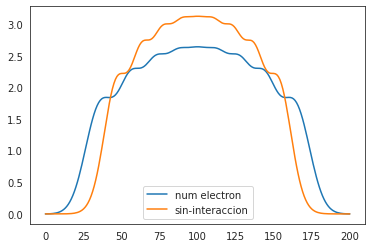

In [45]:
plt.plot(nx, label="num electron")
plt.plot(get_nx(num_electron, psi_harm, x), label="sin-interaccion")
plt.legend()
plt.show()